<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [21]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import scipy.stats
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
data = boston_df.copy()

# Display basic info
print("Dataset Info:")
print(data.info())

# Display first few rows
print("\nFirst 5 Rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB
None

First 5 Rows:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0 

In [10]:
#Descriptive Statistics

# Generate basic descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
st

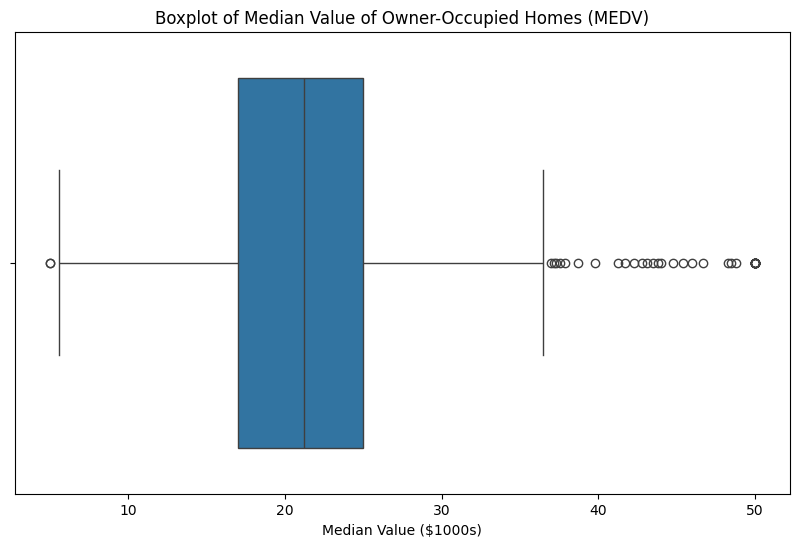

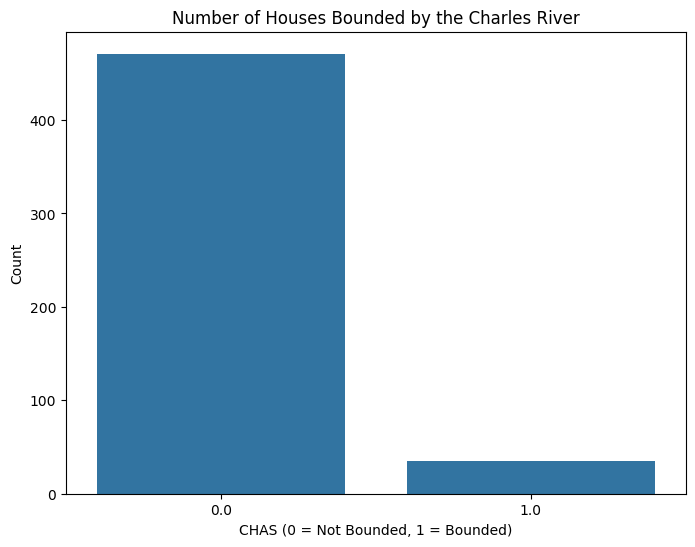

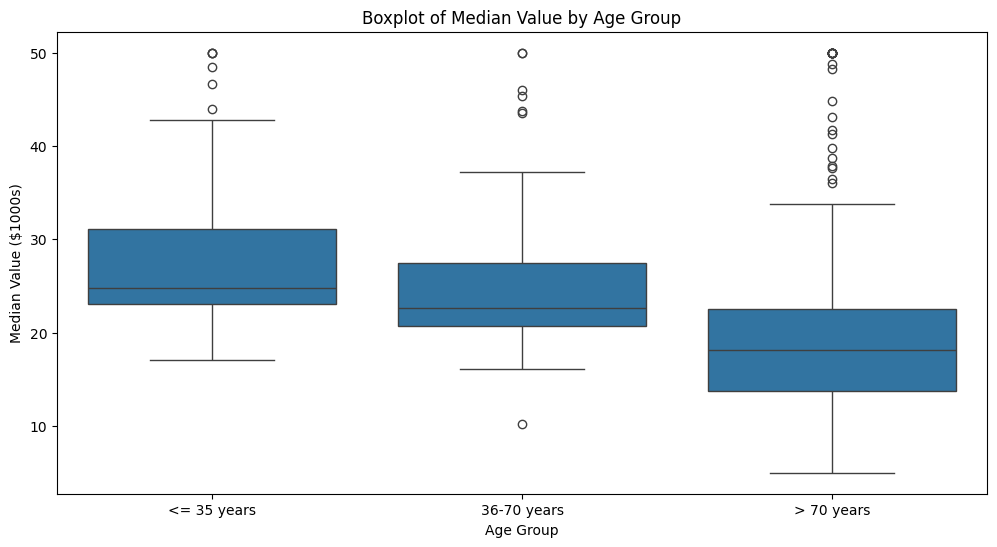

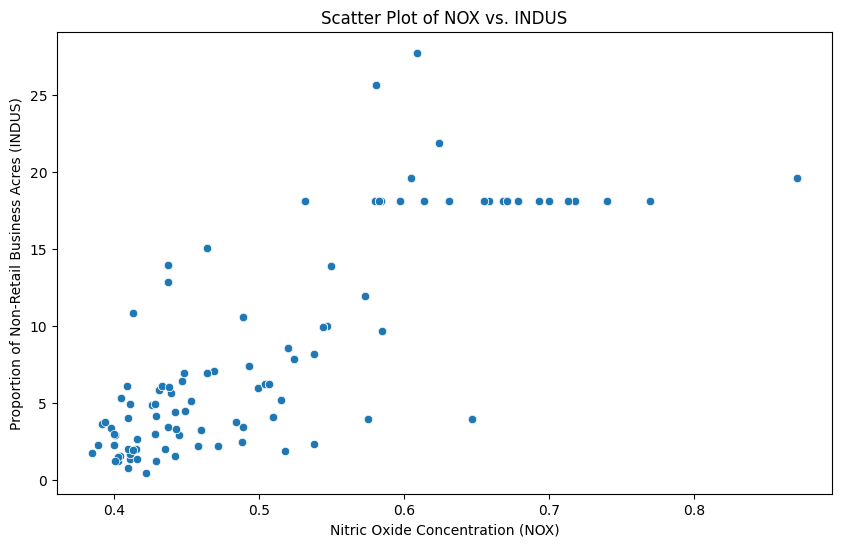

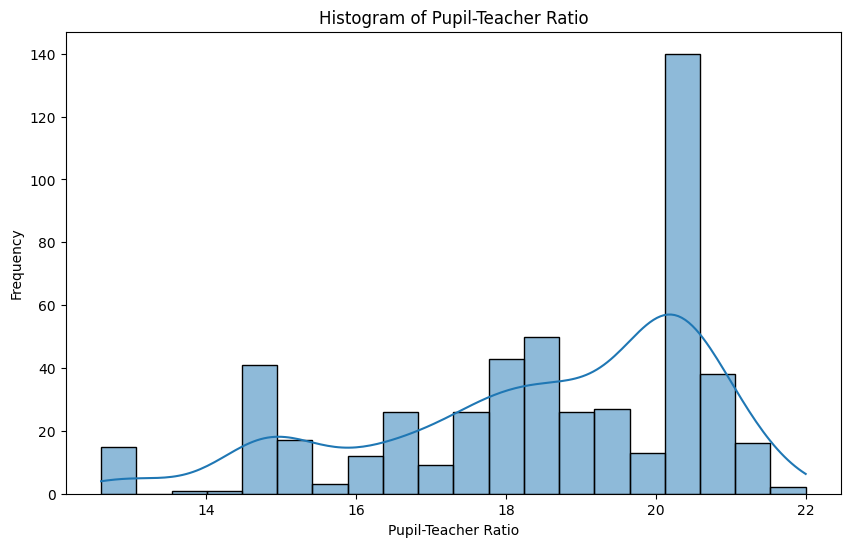

In [14]:
#Visualizations

#Boxplot for Median Value of Owner-Occupied Homes (MEDV)

plt.figure(figsize=(10, 6))
sns.boxplot(x='MEDV', data=data)
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value ($1000s)')
plt.show()

#Bar Plot for the Charles River Variable (CHAS)
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=data)
plt.title('Number of Houses Bounded by the Charles River')
plt.xlabel('CHAS (0 = Not Bounded, 1 = Bounded)')
plt.ylabel('Count')
plt.show()

#Boxplot of MEDV vs. AGE (Discretized into 3 groups)
# Discretize AGE into 3 groups
bins = [0, 35, 70, 100]
labels = ['<= 35 years', '36-70 years', '> 70 years']
data['AGE_Group'] = pd.cut(data['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=data)
plt.title('Boxplot of Median Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

#Scatter Plot of NOX vs. INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=data)
plt.title('Scatter Plot of NOX vs. INDUS')
plt.xlabel('Nitric Oxide Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

#Histogram for Pupil-Teacher Ratio (PTRATIO)
plt.figure(figsize=(10, 6))
sns.histplot(data['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [17]:
#Statistical Tests

#T-test for Difference in Median Value of Houses Bounded by Charles River

# Split the data into two groups based on the Charles River
group1 = data[data['CHAS'] == 1]['MEDV']  # Bounded by river
group2 = data[data['CHAS'] == 0]['MEDV']  # Not bounded by river

# Perform T-test
t_stat, p_value = ttest_ind(group1, group2)

# Print results
print("\nT-test for Charles River Impact on Median Value:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject H0: Significant difference in median values.")
else:
    print("Fail to Reject H0: No significant difference.")



T-test for Charles River Impact on Median Value:
T-statistic: 3.9964
P-value: 0.0001
Reject H0: Significant difference in median values.


In [18]:
#ANOVA for Difference in Median Values by AGE Group

# Perform ANOVA test
group1 = data[data['AGE_Group'] == '<= 35 years']['MEDV']
group2 = data[data['AGE_Group'] == '36-70 years']['MEDV']
group3 = data[data['AGE_Group'] == '> 70 years']['MEDV']

f_stat, p_value = f_oneway(group1, group2, group3)

# Print results
print("\nANOVA for MEDV Across Age Groups:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject H0: Significant difference between groups.")
else:
    print("Fail to Reject H0: No significant difference.")



ANOVA for MEDV Across Age Groups:
F-statistic: 36.4076
P-value: 0.0000
Reject H0: Significant difference between groups.


In [19]:
#Pearson Correlation Between NOX and INDUS
# Pearson correlation
corr, p_value = pearsonr(data['NOX'], data['INDUS'])

# Print results
print("\nPearson Correlation Between NOX and INDUS:")
print(f"Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject H0: Significant correlation exists.")
else:
    print("Fail to Reject H0: No significant correlation.")



Pearson Correlation Between NOX and INDUS:
Correlation Coefficient: 0.7637
P-value: 0.0000
Reject H0: Significant correlation exists.



Linear Regression: Impact of Distance to Employment Centers on MEDV
Coefficient: 1.0916
Intercept: 18.3901


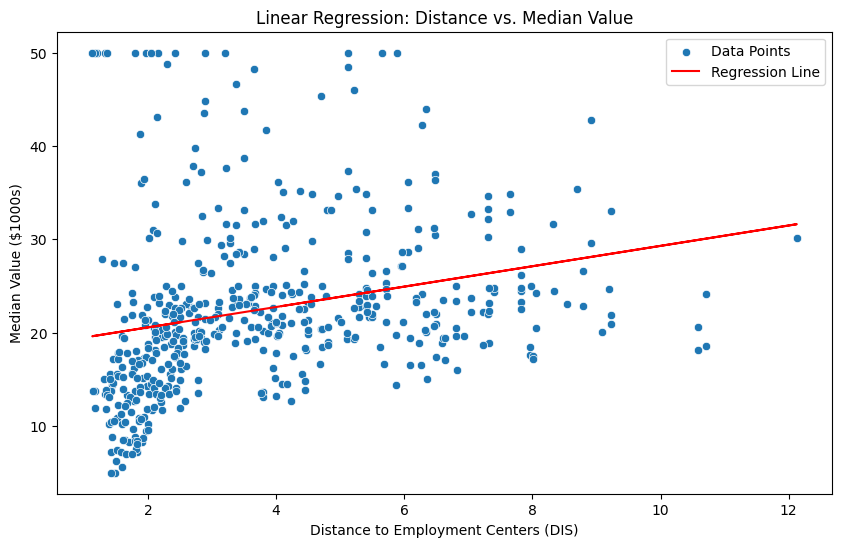

In [22]:
#Linear Regression: Impact of DIS on MEDV

# Regression: DIS vs. MEDV
X = data[['DIS']]  # Independent variable
y = data['MEDV']   # Dependent variable

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Display regression results
print("\nLinear Regression: Impact of Distance to Employment Centers on MEDV")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DIS', y='MEDV', data=data, label='Data Points')
plt.plot(data['DIS'], model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: Distance vs. Median Value')
plt.xlabel('Distance to Employment Centers (DIS)')
plt.ylabel('Median Value ($1000s)')
plt.legend()
plt.show()